In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

sns.set()

In [2]:
#Load the CSV into a Pandas DataFrame
df = pd.read_csv('/Users/chrisjohanson/Desktop/Springboard/Pulsar capstone/pulsar_stars.csv')

In [3]:
#Fix the white space in front of all the column names (except for target_class)
clean_column_names = []

for name in df.columns:
    clean_name = name.lstrip()
    clean_column_names.append(clean_name)
    
df.columns = clean_column_names
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [4]:
#Divide the dataset into two separate target class groups
pulsars = df[df.target_class == 1]
non_pulsars = df[df.target_class == 0]

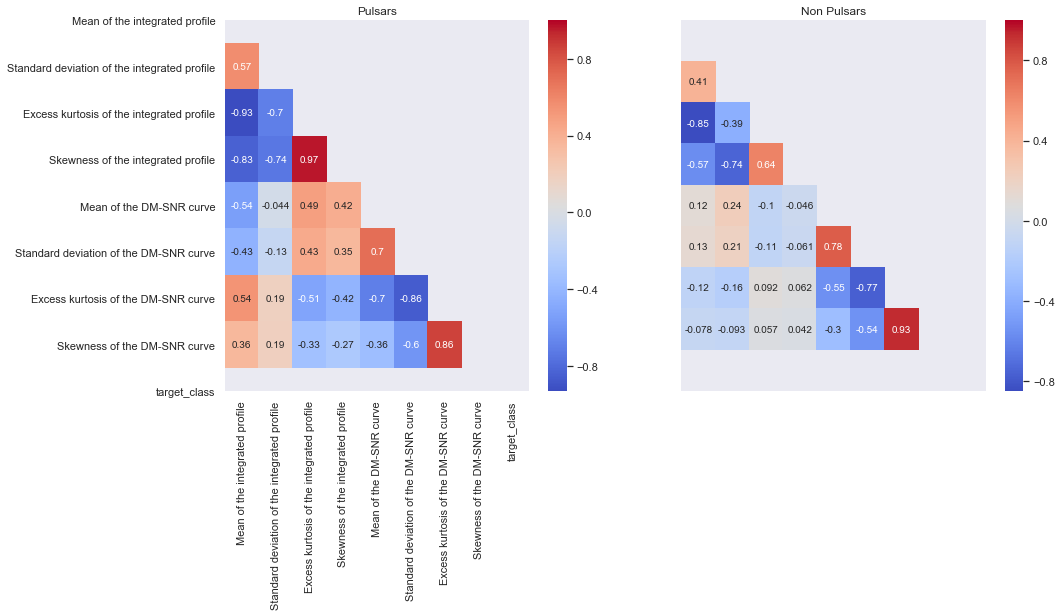

In [31]:
#Create a correlation matrix heatmap for pulsars and non_pulsars to compare the two
_ = plt.figure(figsize=(15, 15))
_ = plt.subplot(221)
_ = plt.title("Pulsars")
matrix = np.triu(pulsars.corr())
sns.heatmap(pulsars.corr(), annot=True, cmap='coolwarm', mask=matrix, fmt='.2g')

_ = plt.subplot(222)
_ = plt.title("Non Pulsars")
matrix = np.triu(non_pulsars.corr())
sns.heatmap(non_pulsars.corr(), annot=True, cmap='coolwarm', mask=matrix, xticklabels=False, yticklabels=False, fmt='.2g')

plt.savefig('Correlation Matrix Heatmap.png', orientation='landscape')

In [38]:
#Create a function to visualize the two distributions and mark where the mean is for each
def plot_distributions(data1, datalabel1, data2, datalabel2, title):
    plt.figure(figsize=(15,10))
    sns.distplot(data1, label=datalabel1)#blue
    sns.distplot(data2, label=datalabel2)#orange
    plt.axvline(np.mean(data1), color='b', linestyle='dashed')
    plt.axvline(np.mean(data2), color='orange', linestyle='dashed')
    plt.title(title, size=20)
    plt.ylabel("Frequency")
    plt.legend()
    
    return plt.figure

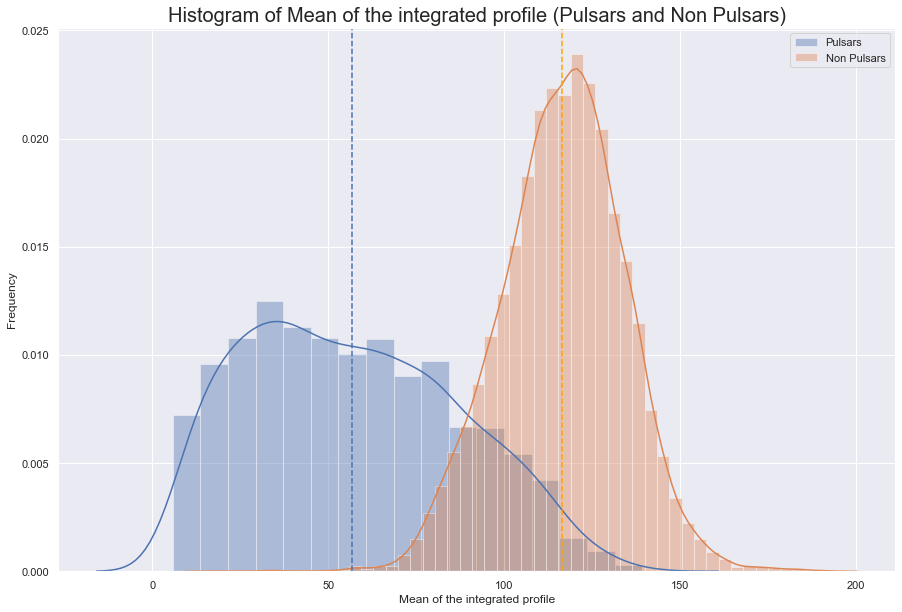

In [40]:
'''Plot the matching distributions for pulsars and non_pulsars then
perform a two sample t test for statistical significance'''

#Mean of the integrated profile
plot_distributions(pulsars['Mean of the integrated profile'], "Pulsars",
                  non_pulsars['Mean of the integrated profile'], "Non Pulsars",
                  "Histogram of Mean of the integrated profile (Pulsars and Non Pulsars)")

plt.savefig('Dual Historgram - Mean of IP.png')

In [8]:
#Check for equal variance
np.var(pulsars['Mean of the integrated profile']), np.var(non_pulsars['Mean of the integrated profile'])

(899.9130775449656, 305.38943249398295)

In [9]:
t_stat1, p_value1 = ttest_ind(pulsars['Mean of the integrated profile'], non_pulsars['Mean of the integrated profile'], equal_var=False)
print(f"Since the p-value is {p_value1}, we reject the null hypothesis that the two samples have identical expected values")

Since the p-value is 0.0, we reject the null hypothesis that the two samples have identical expected values


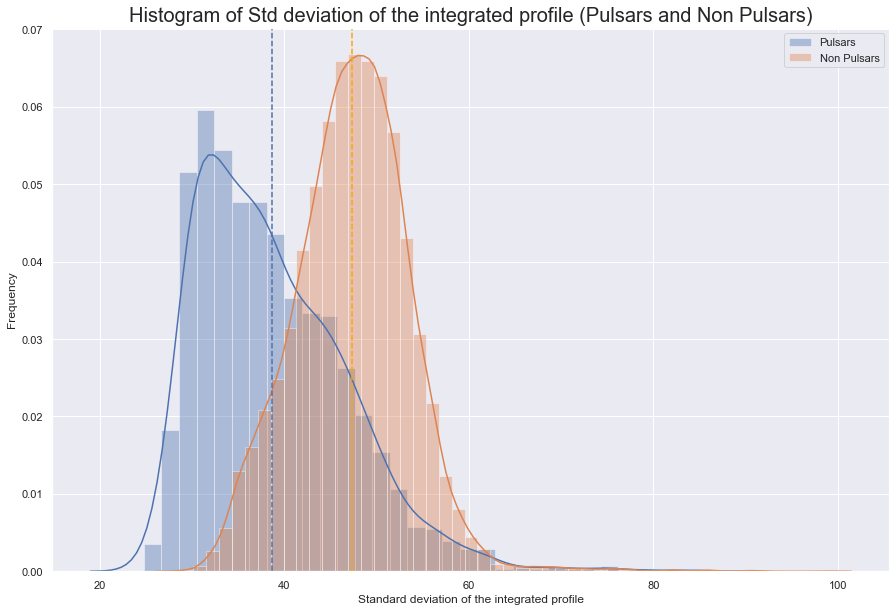

In [54]:
plot_distributions(pulsars['Standard deviation of the integrated profile'], 'Pulsars',
                  non_pulsars['Standard deviation of the integrated profile'], 'Non Pulsars',
                  "Histogram of Std deviation of the integrated profile (Pulsars and Non Pulsars)")

plt.savefig("Dual Historgram - Std Dev of IP")

In [11]:
np.var(pulsars['Standard deviation of the integrated profile']), np.var(non_pulsars['Standard deviation of the integrated profile'])

(64.49958158209434, 38.226261960976686)

In [12]:
t_stat2, p_value2 = ttest_ind(pulsars['Standard deviation of the integrated profile'], non_pulsars['Standard deviation of the integrated profile'], equal_var=False)
print(f"Since the p-value is {p_value2}, we reject the null hypothesis that the two samples have identical expected values")

Since the p-value is 3.99272404103977e-273, we reject the null hypothesis that the two samples have identical expected values


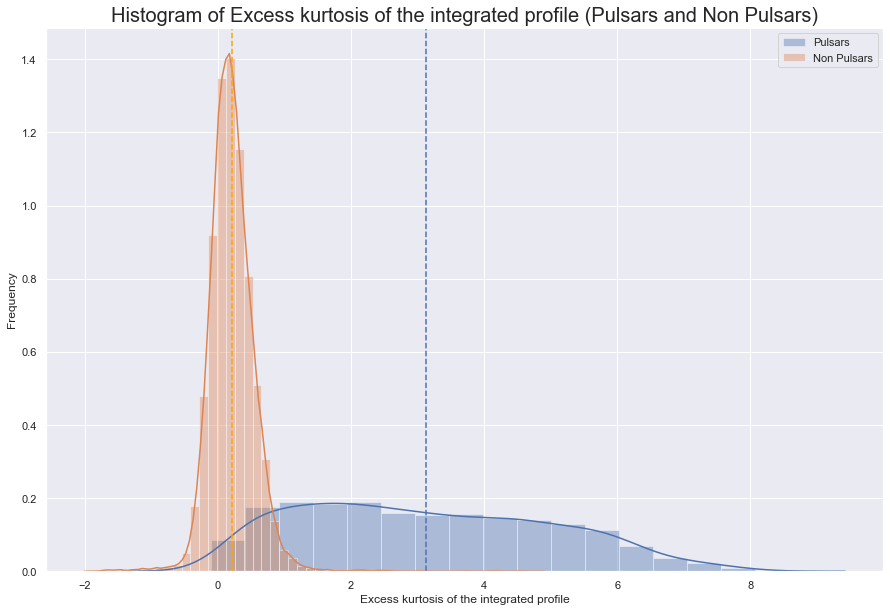

In [55]:
plot_distributions(pulsars['Excess kurtosis of the integrated profile'], 'Pulsars',
                  non_pulsars['Excess kurtosis of the integrated profile'], 'Non Pulsars',
                  "Histogram of Excess kurtosis of the integrated profile (Pulsars and Non Pulsars)")

plt.savefig("Dual Histogram - Excess kurtosis of IP")

In [14]:
np.var(pulsars['Excess kurtosis of the integrated profile']), np.var(non_pulsars['Excess kurtosis of the integrated profile'])

(3.5054669871415007, 0.11195428061382147)

In [15]:
t_stat3, p_value3 = ttest_ind(pulsars['Excess kurtosis of the integrated profile'], non_pulsars['Excess kurtosis of the integrated profile'], equal_var=False)
print(f"Since the p-value is {p_value3}, we reject the null hypothesis that the two samples have identical expected values")

Since the p-value is 0.0, we reject the null hypothesis that the two samples have identical expected values


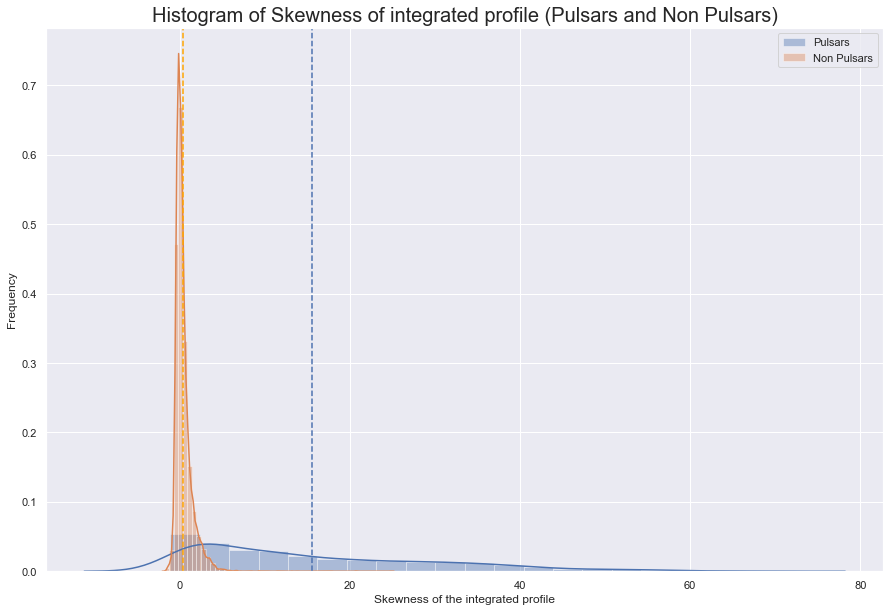

In [56]:
plot_distributions(pulsars['Skewness of the integrated profile'], 'Pulsars',
                  non_pulsars['Skewness of the integrated profile'], 'Non Pulsars',
                  "Histogram of Skewness of integrated profile (Pulsars and Non Pulsars)")

plt.savefig("Dual Histogram - Skewness of IP")

In [17]:
np.var(pulsars['Skewness of the integrated profile']), np.var(non_pulsars['Skewness of the integrated profile'])

(195.8020740480187, 1.056289314490304)

In [18]:
t_stat4, p_value4 = ttest_ind(pulsars['Skewness of the integrated profile'], non_pulsars['Skewness of the integrated profile'], equal_var=False)
print(f"Since the p-value is {p_value4}, we reject the null hypothesis that the two samples have identical expected values")

Since the p-value is 8.735371914187084e-279, we reject the null hypothesis that the two samples have identical expected values


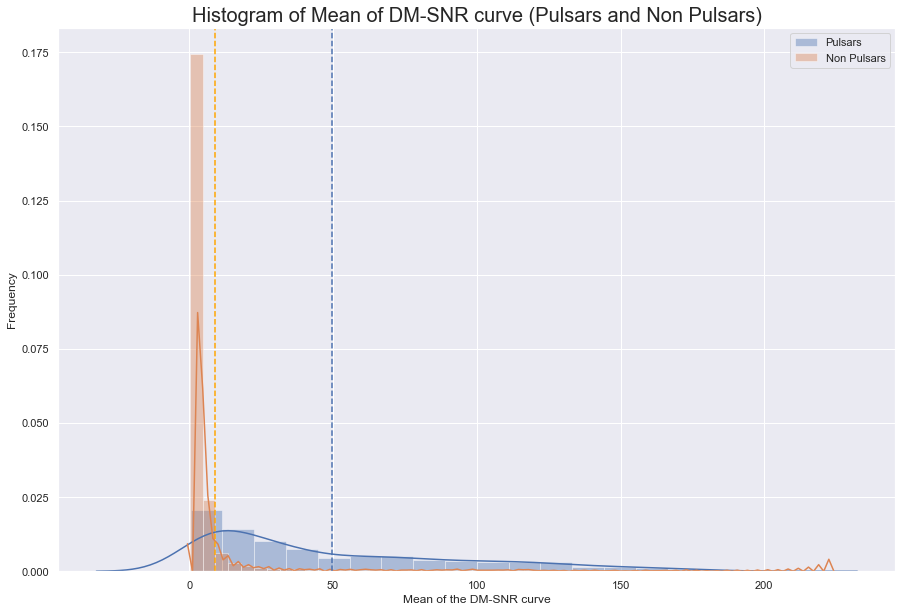

In [49]:
plot_distributions(pulsars['Mean of the DM-SNR curve'], 'Pulsars',
                  non_pulsars['Mean of the DM-SNR curve'], 'Non Pulsars',
                  "Histogram of Mean of DM-SNR curve (Pulsars and Non Pulsars)")

plt.savefig("Dual Histogram - Mean of DMSNR")

In [20]:
np.var(pulsars['Mean of the DM-SNR curve']), np.var(non_pulsars['Mean of the DM-SNR curve'])

(2049.745373471084, 595.8802438533996)

In [21]:
t_stat5, p_value5 = ttest_ind(pulsars['Mean of the DM-SNR curve'], non_pulsars['Mean of the DM-SNR curve'], equal_var=False)
print(f"Since the p-value is {p_value5}, we reject the null hypothesis that the two samples have identical expected values")

Since the p-value is 2.7586700453147315e-213, we reject the null hypothesis that the two samples have identical expected values


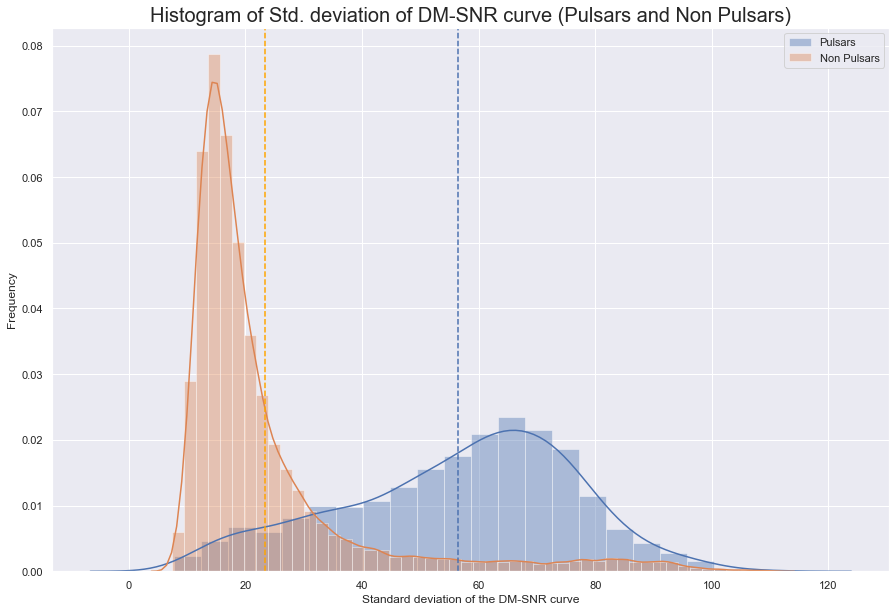

In [50]:
plot_distributions(pulsars['Standard deviation of the DM-SNR curve'], 'Pulsars',
                  non_pulsars['Standard deviation of the DM-SNR curve'], 'Non Pulsars',
                  "Histogram of Std. deviation of DM-SNR curve (Pulsars and Non Pulsars)")

plt.savefig("Dual Histogram - Std Dev of DMSNR")

In [23]:
np.var(pulsars['Standard deviation of the DM-SNR curve']), np.var(non_pulsars['Standard deviation of the DM-SNR curve'])

(389.0779728356964, 277.2529272833717)

In [24]:
t_stat6, p_value6 = ttest_ind(pulsars['Standard deviation of the DM-SNR curve'], non_pulsars['Standard deviation of the DM-SNR curve'], equal_var=False)
print(f"Since the p-value is {p_value6}, we reject the null hypothesis that the two samples have identical expected values")

Since the p-value is 0.0, we reject the null hypothesis that the two samples have identical expected values


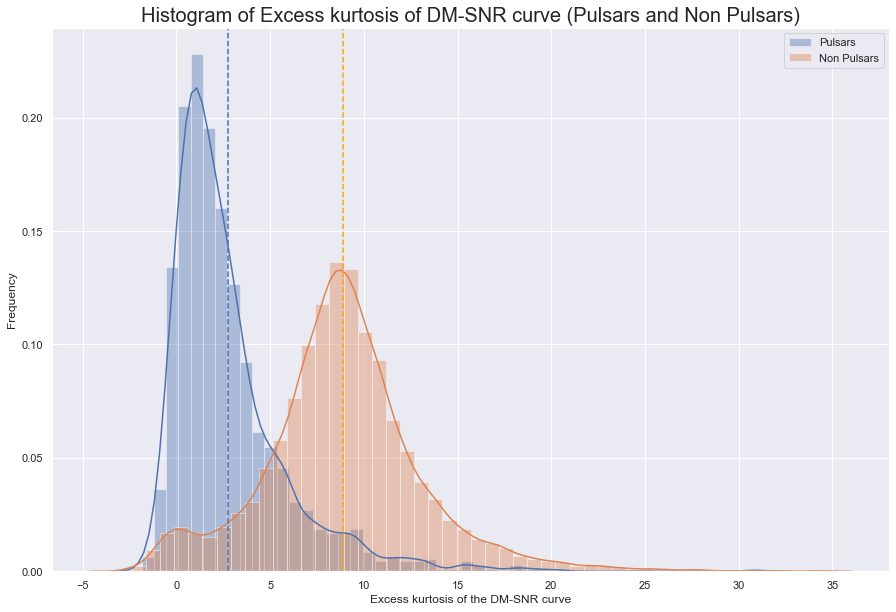

In [51]:
plot_distributions(pulsars['Excess kurtosis of the DM-SNR curve'], 'Pulsars',
                  non_pulsars['Excess kurtosis of the DM-SNR curve'], 'Non Pulsars',
                  "Histogram of Excess kurtosis of DM-SNR curve (Pulsars and Non Pulsars)")

plt.savefig('Dual Histogram - Excess kurtosis of DMSNR')

In [26]:
np.var(pulsars['Excess kurtosis of the DM-SNR curve']), np.var(non_pulsars['Excess kurtosis of the DM-SNR curve'])

(9.641007785524103, 17.964841257932807)

In [27]:
t_stat7, p_value7 = ttest_ind(pulsars['Excess kurtosis of the DM-SNR curve'], non_pulsars['Excess kurtosis of the DM-SNR curve'], equal_var=False)
print(f"Since the p-value is {p_value7}, we reject the null hypothesis that the two samples have identical expected values")

Since the p-value is 0.0, we reject the null hypothesis that the two samples have identical expected values


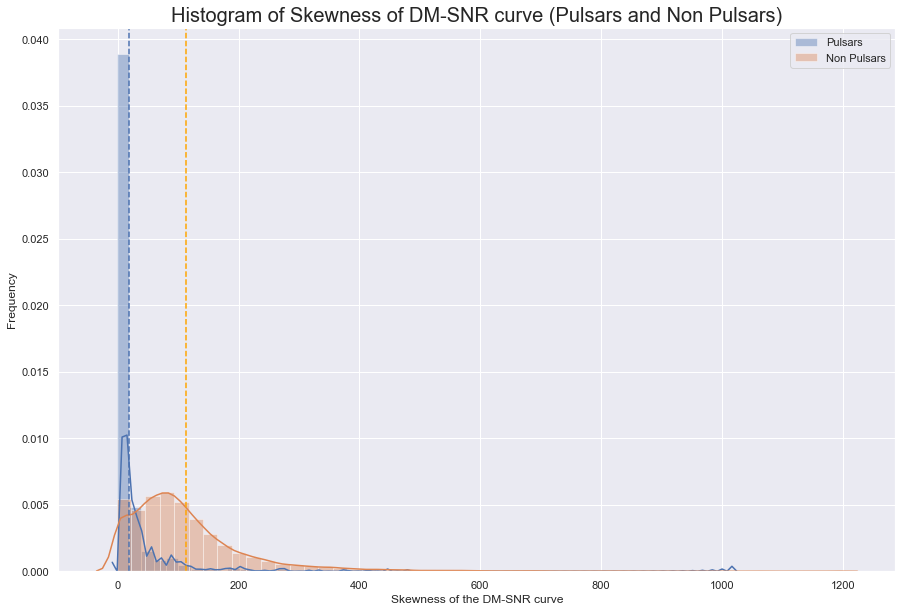

In [52]:
plot_distributions(pulsars['Skewness of the DM-SNR curve'], 'Pulsars',
                  non_pulsars['Skewness of the DM-SNR curve'], 'Non Pulsars',
                  "Histogram of Skewness of DM-SNR curve (Pulsars and Non Pulsars)")

plt.savefig("Dual Histogram - Skewness of DMSNR")

In [29]:
np.var(pulsars['Skewness of the DM-SNR curve']), np.var(non_pulsars['Skewness of the DM-SNR curve'])

(2588.849122512562, 11388.869916528167)

In [30]:
t_stat8, p_value8 = ttest_ind(pulsars['Skewness of the DM-SNR curve'], non_pulsars['Skewness of the DM-SNR curve'], equal_var=False)
print(f"Since the p-value is {p_value8}, we reject the null hypothesis that the two samples have identical expected values")

Since the p-value is 0.0, we reject the null hypothesis that the two samples have identical expected values
